<a href="https://colab.research.google.com/github/abuwildanm/Heart-Disease/blob/master/Heart_Disease_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Diagnosis
---

### Authors:
1. Abu Wildan Mucholladin
2. Haekal Rizky Yulianto
3. Vincent Junitio Ungu

## Introduction
---



In the field of healthcare, Machine Learning is widely used in various fields of science like to identify the rare diseases, understanding the patterns to predict a rare disease and so on. According to the survey conducted by World Health Organization, 17.9 million total global deaths occur due to heart attacks and strokes in 2016 [[1](https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds))]. The application of algorithms and interpretation of the patterns can be helpful in saving numerous people lives by anticipating the condition of the disease in advance. This project is focused on determining whether the patient has a heart disease or not by taking into consideration the UCI dataset. The dataset originally contained seventy six attributes which were collected from four different databases and fourteen attributes are used for this project [[2](https://www.kaggle.com/ronitf/heart-disease-uci)].

## Import Libraries and Tools

In [1]:
# Import standard library
import numpy as np
import pandas as pd

# Import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier

# Import visualization library
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import cufflinks as cf
cf.go_offline()

import IPython
# Plotly Configuration
# Ref : https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory
def configure_plotly_browser_state():
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)

## Dataset Description
Taken from Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci

---

### Attribute Information:

1. **age**: the patient's age in years
2. **sex**: the patient's gender (1=male; 0=female)
3. **cp**: chest pain type (4 values)
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. **trestbps**: the patient's resting blood pressure (mm Hg on admission to the hospital)
5. **chol**: the patient's cholesterol measurement in mg/dl
6. **fbs**: the patient's fasting blood sugar (> 120 mg/dl, 1=true; 0=false)
7. **restecg**: resting electrocardiographic results (3 values)
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach**: the patient's maximum heart rate achieved
9. **exang**: exercise induced angina (1=yes; 0=no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment (3 values)
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. **ca**: number of major vessels (0-3) colored by flourosopy
13. **thal**: a blood disorder called thalassemia (3=normal; 6=fixed defect; 7=reversable defect)
14. **target**: heart disease (0=no; 1=yes)

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/abuwildanm/Heart-Disease/master/heart.csv')
df = data.copy()
data.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [3]:
feature_discrete = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
feature_continuous = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

We separate the discrete and continuous features to make it easier to do the analysis. We will do the analysis using the 'data' variable and preprocessing & modeling using the 'df' variable

In [4]:
data.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We get information that the dataset has 303 entries and 14 attributes (13 features & 1 target)

In [6]:
data.describe()

age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]

### Hypothesis
---

To avoid [HARKing](https://journals.sagepub.com/doi/abs/10.1207/s15327957pspr0203_4) (or Hypothesizing After the Results are Known) let's take a look at online guides on how heart disease is diagnosed, and look up some of the terms above.

**Diagnosis**: The diagnosis of heart disease is done on a combination of clinical signs and test results. The types of tests run will be chosen on the basis of what the physician thinks is going on [[1](https://www.mayoclinic.org/diseases-conditions/heart-disease/diagnosis-treatment/drc-20353124)], ranging from electrocardiograms and cardiac computerized tomography (CT) scans, to blood tests and exercise stress tests [[2](https://www.heartfoundation.org.au/your-heart/living-with-heart-disease/medical-tests)].

Looking at information of heart disease risk factors led us to the following: **high cholesterol, high blood pressure, diabetes, weight, family history and smoking** [[3](https://www.bhf.org.uk/informationsupport/risk-factors)]. According to another source [[4](https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack)], the major factors that can't be changed are: **increasing age, male gender and heredity**. Note that thalassemia, one of the variables in this dataset, is heredity. Major factors that can be modified are: **Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes**. Other factors include **stress, alcohol and poor diet/nutrition**.

We can see no reference to the 'number of major vessels', but given that the definition of heart disease is **"...what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries"**, it seems logical the more major vessels is a good thing, and therefore will reduce the probability of heart disease.

Given the above, we would hypothesis that, if the model has some predictive ability, we'll see these factors standing out as the most important.

## Exploratory Data Analysis

### Data Manipulation

In [7]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
                'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 
                'max_heart_rate_achieved', 'exercise_induced_angina', 
                'st_depression', 'st_slope', 'num_major_vessels', 
                'thalassemia', 'target']

col_discrete = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 
                'exercise_induced_angina', 'st_slope', 'num_major_vessels', 
                'thalassemia']
col_continuous = ['age', 'resting_blood_pressure', 'cholesterol', 
                  'max_heart_rate_achieved', 'st_depression']

Changing the name of the column aims to facilitate the analysis and interpretation of data

In [8]:
data = data[data['thalassemia'] > 0]
data.reset_index(drop=True, inplace=True)
df = df[df['thal'] > 0]
df.reset_index(drop=True, inplace=True)

Data with the **thalassemia** attribute of 0 will be discarded, because it does not represent any value (as described in the dataset description)

In [9]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/dl'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/dl'

data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

Each value of the discrete attribute will be replaced by a value that more explains the purpose. This will make it easier to represent data in visual form

In [10]:
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')

Changing data types is just to make it easier to create dummy variables from discrete attributes

### Data Distribution

In [76]:
data[col_discrete].iplot(kind='hist', subplots=True, title='Discrete Attribute Distribution')

**Discrete Attribute Description**:
1. **The number of male patients is greater than female patients**
2. **Most patients suffer from typical angina chest pain type**. Angina pectoris or typical angina is the discomfort that is noted when the heart does not get enough blood or oxygen. Typical angina is usually defined with the following [characteristics](https://www.textbookofcardiology.org/wiki/Chest_Pain_/_Angina_Pectoris):
    - Substernal chest discomfort of characteristic quality and duration
    - Provoked by exertion or emotional stress
    - Relieved by rest and/or nitroglycerine
    
   For atypical angina or non-anginal pain only show 2 or 1 of these characteristics. Asymptomatic means not showing any symptoms
3. [Fasting blood sugar test](https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451) is a test carried out to measure blood sugar after an overnight fast. If fasting blood sugar level lower than 120 mg/dL is normal, but if it's higher than 120 mg/dL on two separate tests, the patient has diabetes. From the visualization above, **most patients have a test result of less than 120 mg/dL which means that is normal**
4. The [resting electrocardiogram (ECG)](https://www.physimed.com/accueil-patients/diagnostic-techniques/resting-ecg/?lang=en) is a test that measures the electrical activity of the heart. Normally, the electric impulses cross the heart, which contracts approximately 60 – 80 times per minute at rest. Each contraction of the ventricles represents one heartbeat. From the visualization above it turns out to show a **balance** of **the number of patients who have normal and abnormal heart rates**
5. [Angina](https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373), which may also be called angina pectoris, is often described as squeezing, pressure, heaviness, tightness or pain in the chest. Angina is a type of chest pain caused by reduced blood flow to the heart. Angina is a symptom of coronary artery disease. Angina can be exercise-induced or caused by other symptoms of heart disease. In this case, **most patients experience angina that is not caused by exercise**
6. Patients who have horizontal ST segment depression of ⩽ 2 mm and **downsloping ST segment depression**, then it shows a [high probability](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1123032/) of affected heart disease. In this case, there are so many patients who show downsloping ST depression segment that it is very likely that **many patients have heart disease**
7. It appears that the number of major vessels in most patients is 0. Of course, blood vessels are very important for humans because these can flow nutrients and oxygen throughout the body until they return to the heart. However, **when the number of major vessels is reduced due to fat, it could be causing heart disease**
8. [Thalassemia](https://www.mayoclinic.org/diseases-conditions/thalassemia/symptoms-causes/syc-20354995) is a blood disorder passed down through families (inherited) in which the body makes an abnormal form or inadequate amount of hemoglobin. Evidently, many patients suffer **fixed defect of thalassemia** where this will **increase the chances of patients affected by heart disease**

In [66]:
data[col_continuous].iplot(kind='hist', bins=10, subplots=True, title='Continuous Attribute Distribution')

**Continuous Attribute Description**:
1. Most patients are in the age range of 55-59
2. [Diastolic (resting) blood pressure](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings) indicates how much pressure your blood is exerting against your artery walls while the heart is resting between beats. When a person has a diastolic blood pressure of more than 80 mm Hg, it indicates that the person has high blood pressure (hypertension). It appears that **a lot of patients have high blood pressure** so it shows that there are **many patients who have a risk of heart disease**
3. Cholesterol?
4. Max heart rate achieved?
5. ST Depression?

In [13]:
data['target'].iplot(kind='hist', subplots=True, title='Target Distribution')

### Discrete Attribute

In [14]:
def plot_discrete(variable, term):
    cross_table = pd.crosstab(data['target'], data[variable])

    # Visualisation
    x = cross_table.index
    data_bar = []
    for col in cross_table.columns:
        bar = go.Bar(name=col, x=x, y=cross_table[col])
        data_bar.append(bar)

    fig = go.Figure(data=data_bar)
    fig.update_layout(barmode='group', 
                    title='The number of heart disease sufferers in terms of ' + term, 
                    xaxis_title='Diagnosis of Heart Disease (0=no; 1=yes)', 
                    yaxis_title='Frequency')
    fig.show()

In [15]:
plot_discrete('sex', 'Gender')

In [16]:
plot_discrete('chest_pain_type', 'Chest Pain Type')

In [17]:
plot_discrete('fasting_blood_sugar', 'Fasting Blood Sugar')

In [18]:
plot_discrete('rest_ecg', 'Resting ECG Results')

In [19]:
plot_discrete('exercise_induced_angina', 'Exercise Induced Angina')

In [20]:
plot_discrete('st_slope', 'the slope of the peak exercise ST segment')

In [21]:
plot_discrete('num_major_vessels', 'Number of Major Vessels')

In [22]:
plot_discrete('thalassemia', 'Thalassemia')

### Continuous Attribute

In [23]:
trace_splom = go.Splom(dimensions=[dict(label='age', values=data['age']),
                                   dict(label='resting_blood_pressure', values=data['resting_blood_pressure']),
                                   dict(label='cholesterol', values=data['cholesterol']),
                                   dict(label='max_heart_rate_achieved', values=data['max_heart_rate_achieved']),
                                   dict(label='st_depression', values=data['st_depression'])],
                      text=data['target'],
                      marker=dict(color=data['target'],
                                  colorscale='Bluered', 
                                  showscale=False, 
                                  line_color='white', 
                                  line_width=0.5)
                      )
fig = go.Figure(data=trace_splom)
fig.update_layout(title='Continuous Attribute Scatter', width=1000, height=1000)
fig.show()

### Attribute Correlation

In [24]:
# Pearson Product Correlation
corr = data.corr()

hm = go.Heatmap(z=corr, x=corr.index, y=corr.columns, colorscale='RdBu', reversescale=True)
layout = go.Layout(title='Correlation Heatmap')
fig = go.Figure(data=hm, layout=layout)
fig.show()

In [25]:
corr['target'].sort_values(ascending = False)

target                     1.000000
max_heart_rate_achieved    0.430447
cholesterol               -0.086861
resting_blood_pressure    -0.145564
age                       -0.226722
num_major_vessels         -0.394139
st_depression             -0.430131
Name: target, dtype: float64

Interpretation of correlation coefficient

- The correlation coefficient ranges from -1 to +1.


- When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is no variable which has strong positive correlation with target variable.


- When it is clsoe to -1, it means that there is a strong negative correlation. So, we can see that there is no variable which has strong negative correlation with target variable.


- When it is close to 0, it means that there is no correlation. So, there is no correlation between target and fbs.


- However, We can see that the **max_heart_rate_achieved** are mildly positively correlated with target variable. 

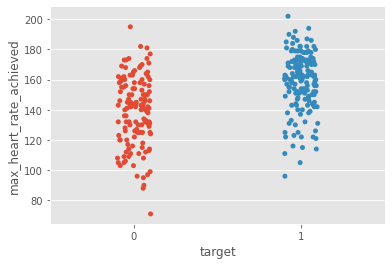

In [26]:
sns.stripplot(x="target", y="max_heart_rate_achieved", data=data)
plt.show()

Interpretation

We can see that those people suffering from heart disease (**target** = 1) have relatively higher heart rate (**max_heart_rate_achieved**) as compared to people who are not suffering from heart disease (**target** = 0).

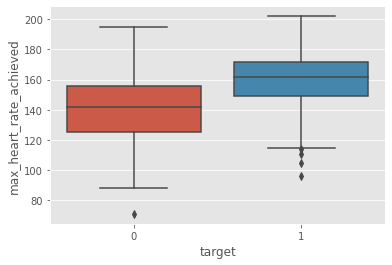

In [27]:
sns.boxplot(x="target", y="max_heart_rate_achieved", data=data)
plt.show()

## Preprocessing

### Duplication Check

In [28]:
df[df.duplicated(keep=False)]

age sex cp  trestbps  chol fbs  ... exang  oldpeak slope  ca thal target
162   38   1  2       138   175   0  ...     0      0.0     2   4    2      1
163   38   1  2       138   175   0  ...     0      0.0     2   4    2      1

[2 rows x 14 columns]

In [29]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

### Missing Values Check

In [30]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Outlier Detection

In [31]:
box = [go.Box(y=df[col], name=col) for col in df]
layout = go.Layout(title='Outlier Detection')
fig = go.Figure(data=box, layout=layout)
fig.show()

In [32]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# lowerBound = Q1 - 1.5*IQR
# upperBound = Q3 + 1.5*IQR

# original = df.copy()
# df = df[~((df.iloc[:, :-1] < lowerBound) | (df.iloc[:, :-1] > upperBound)).any(axis=1)]
# df.reset_index(drop=True, inplace=True)

# print('Data dengan outlier              : ', original.shape)
# print('Data setelah outlier dihilangkan : ', df.shape)

### Feature Selection

Feature importance gives us a score for each feature of the data, the higher the score more important or relevant is the feature towards the output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.


[0.07083755 0.04958786 0.12154243 0.06009041 0.06034403 0.01860764
 0.0346235  0.09206406 0.09027358 0.08485458 0.07217408 0.12428699
 0.12071328]

10 Most Important Features


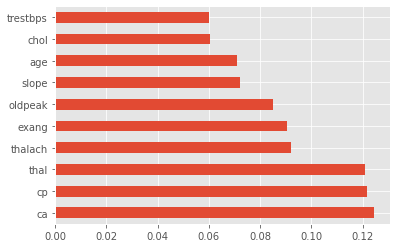

In [33]:
X = df.iloc[:,0:13]  #independent columns
y = df.iloc[:,-1]    #target column 

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators = 100)
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
print('\n10 Most Important Features')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Feature Scaling

In [34]:
df = pd.get_dummies(df)
target = df['target'].copy()
df.drop(columns='target', inplace=True)
df['target'] = target
df.head()

age  trestbps  chol  thalach  oldpeak  ...  ca_4  thal_1  thal_2  thal_3  target
0   63       145   233      150      2.3  ...     0       1       0       0       1
1   37       130   250      187      3.5  ...     0       0       1       0       1
2   41       130   204      172      1.4  ...     0       0       1       0       1
3   56       120   236      178      0.8  ...     0       0       1       0       1
4   57       120   354      163      0.6  ...     0       0       1       0       1

[5 rows x 30 columns]

In [35]:
mms = MinMaxScaler()
mms_df = mms.fit_transform(df[feature_continuous])
mms_df = pd.DataFrame(data=mms_df, columns=df[feature_continuous].columns)

In [36]:
mms_df.iplot(kind='hist', subplots=True, title='Min-Max Distribution')

In [37]:
ss = StandardScaler()
ss_df = ss.fit_transform(df[feature_continuous])
ss_df = pd.DataFrame(ss_df, columns=df[feature_continuous].columns)

In [38]:
ss_df.iplot(kind='hist', subplots=True, title='Z-Transform Distribution')

In [39]:
# df[feature_continuous] = mms_df.copy()
df[feature_continuous] = ss_df.copy()

## Split the data

In [40]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, stratify=df.iloc[:, -1])

## Build Models

### Support Vector Machine

In [41]:
svc = SVC()
svc.fit(x_train, y_train)
print('Train Score : ', svc.score(x_train, y_train))
print('Test Score : ', svc.score(x_test, y_test))

Train Score :  0.9380952380952381
Test Score :  0.8555555555555555


In [42]:
cvSVC = pd.DataFrame(cross_validate(svc, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvSVC

fit_time  score_time  test_score  train_score
0  0.010169    0.003043    0.900000     0.922222
1  0.009726    0.002970    0.833333     0.918519
2  0.005953    0.001671    0.866667     0.925926
3  0.006028    0.001801    0.966667     0.929630
4  0.006150    0.001503    0.833333     0.925926
5  0.005586    0.001443    0.800000     0.933333
6  0.006367    0.001922    0.866667     0.929630
7  0.006674    0.001589    0.833333     0.929630
8  0.005794    0.001635    0.766667     0.944444
9  0.006141    0.001481    0.766667     0.937037

In [43]:
cvSVC.mean()

fit_time       0.006859
score_time     0.001906
test_score     0.843333
train_score    0.929630
dtype: float64

### Random Forest

In [44]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print('Train Score : ', rf.score(x_train, y_train))
print('Test Score : ', rf.score(x_test, y_test))

Train Score :  1.0
Test Score :  0.8


In [45]:
cvRF = pd.DataFrame(cross_validate(rf, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvRF

fit_time  score_time  test_score  train_score
0  0.153053    0.009071    0.866667          1.0
1  0.142119    0.009550    0.833333          1.0
2  0.144013    0.009170    0.866667          1.0
3  0.147894    0.008797    0.933333          1.0
4  0.141590    0.012969    0.800000          1.0
5  0.154144    0.009936    0.866667          1.0
6  0.141958    0.009021    0.800000          1.0
7  0.140843    0.012775    0.900000          1.0
8  0.140550    0.009024    0.766667          1.0
9  0.143962    0.009067    0.766667          1.0

In [46]:
cvRF.mean()

fit_time       0.145013
score_time     0.009938
test_score     0.840000
train_score    1.000000
dtype: float64

### Multi Layer Perceptron

In [47]:
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
print('Train Score : ', mlp.score(x_train, y_train))
print('Test Score : ', mlp.score(x_test, y_test))

Train Score :  0.9285714285714286
Test Score :  0.8444444444444444


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [48]:
cvMLP = pd.DataFrame(cross_validate(mlp, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvMLP

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

fit_time  score_time  test_score  train_score
0  0.496606    0.002344    0.900000     0.955556
1  0.519880    0.003966    0.833333     0.959259
2  0.490534    0.002375    0.833333     0.955556
3  0.505121    0.002340    0.866667     0.962963
4  0.480180    0.002440    0.833333     0.944444
5  0.473749    0.002462    0.900000     0.951852
6  0.521134    0.002416    0.800000     0.970370
7  0.505592    0.002329    0.866667     0.962963
8  0.485614    0.002516    0.766667     0.955556
9  0.500633    0.002347    0.766667     0.944444

In [49]:
cvMLP.mean()

fit_time       0.497904
score_time     0.002553
test_score     0.836667
train_score    0.956296
dtype: float64

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

KNN = KNeighborsClassifier(n_neighbors = 13)
KNN.fit(x_train, y_train)
print('Train Score : ', KNN.score(x_train, y_train))
print('Test Score : ', KNN.score(x_test, y_test))

Train Score :  0.861904761904762
Test Score :  0.8111111111111111


In [51]:
cvKNN = pd.DataFrame(cross_validate(KNN, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvKNN

fit_time  score_time  test_score  train_score
0  0.003729    0.003428    0.900000     0.855556
1  0.002673    0.002982    0.800000     0.862963
2  0.002783    0.003054    0.833333     0.851852
3  0.002651    0.002970    0.966667     0.844444
4  0.002801    0.003082    0.900000     0.848148
5  0.002842    0.003109    0.733333     0.866667
6  0.002865    0.003138    0.866667     0.855556
7  0.002836    0.003170    0.866667     0.851852
8  0.002879    0.003166    0.766667     0.862963
9  0.003592    0.003680    0.800000     0.855556

In [52]:
cvKNN.mean()

fit_time       0.002965
score_time     0.003178
test_score     0.843333
train_score    0.855556
dtype: float64

### Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(x_train, y_train)
print('Train Score : ', nb.score(x_train, y_train))
print('Test Score : ', nb.score(x_test, y_test))

Train Score :  0.861904761904762
Test Score :  0.8111111111111111


In [54]:
cvnb = pd.DataFrame(cross_validate(nb, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvnb

fit_time  score_time  test_score  train_score
0  0.005515    0.001705    0.833333     0.844444
1  0.003949    0.001225    0.800000     0.833333
2  0.002292    0.001108    0.833333     0.851852
3  0.002256    0.001091    0.900000     0.829630
4  0.002232    0.001098    0.833333     0.859259
5  0.002210    0.001094    0.833333     0.848148
6  0.002181    0.001096    0.633333     0.755556
7  0.002390    0.001181    0.900000     0.844444
8  0.002231    0.001099    0.733333     0.814815
9  0.002219    0.001106    0.800000     0.851852

In [55]:
cvnb.mean()

fit_time       0.002748
score_time     0.001180
test_score     0.810000
train_score    0.833333
dtype: float64

### Keras Neural Network

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


#### Hyperparameter Tuning for Batch Size and Number of Epoch

In [57]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(activation = "relu", input_dim = 29, units = 12, kernel_initializer = "uniform"))
    model.add(Dense(activation = "relu", units = 12, kernel_initializer = "uniform"))
    model.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = "uniform"))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# split into input (X) and output (Y) variables
X = x_train
Y = y_train

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Best: 0.866667 using {'batch_size': 100, 'epochs': 100}
0.847619 (0.017817) with: {'batch_size': 10, 'epochs': 10}
0.814286 (0.020203) with: {'batch_size': 10, 'epochs': 50}
0.814286 (0.020203) with: {'batch_size': 10, 'epochs': 100}
0.842857 (0.011664) with: {'batch_size': 20, 'epochs': 10}
0.838095 (0.006734) with: {'batch_size': 20, 'epochs': 50}
0.819048 (0.013469) with: {'batch_size': 20, 'epochs': 100}
0.661905 (0.113289) with: {'batch_size': 40, 'epochs': 10}
0.847619 (0.013469) with: {'batch_size': 40, 'epochs': 50}
0.833333 (0.006734) with: {'batch_size': 40, 'epochs': 100}
0.623810 (0.105839) with: {'batch_size': 60, 'epochs': 10}
0.857143 (0.011664) with: {'batch_size': 60, 'epochs': 50}
0.838095 (0.013469) with: {'batch_size': 60, 'epochs': 100}
0.547619 (0.052597) with: {'batch_size': 80, 'epochs': 10}
0.800000 (0.061721) with: {'batch_size': 80, 'epochs': 50}
0.84285

#### Build Model

In [58]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation = "relu", input_dim = 29, units = 12, kernel_initializer = "uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation = "relu", units = 12, kernel_initializer = "uniform"))

# Adding the output layer
classifier.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = "uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Fit and Validation Split of 33% Training Data

Keras can separate a portion of your training data into a validation dataset and evaluate the performance of the model on that validation dataset each epoch.

We can do this by setting the validation_split argument on the fit() function to a percentage of the size of training dataset.

For example, a reasonable value might be 0.2 or 0.33 for 20% or 33% of training data held back for validation.

In [59]:
classifier.fit(x_train, y_train,
               validation_split=0.33,
               batch_size = grid_result.best_params_.get('batch_size'), 
               epochs = grid_result.best_params_.get('epochs'))

Train on 140 samples, validate on 70 samples
Epoch 1/100
140/140 [==============================] - 0s 2ms/step - loss: 0.6932 - acc: 0.4571 - val_loss: 0.6930 - val_acc: 0.6714
Epoch 2/100
140/140 [==============================] - 0s 57us/step - loss: 0.6930 - acc: 0.6429 - val_loss: 0.6929 - val_acc: 0.7571
Epoch 3/100
140/140 [==============================] - 0s 58us/step - loss: 0.6928 - acc: 0.7429 - val_loss: 0.6928 - val_acc: 0.7429
Epoch 4/100
140/140 [==============================] - 0s 74us/step - loss: 0.6927 - acc: 0.7857 - val_loss: 0.6926 - val_acc: 0.7429
Epoch 5/100
140/140 [==============================] - 0s 41us/step - loss: 0.6924 - acc: 0.7643 - val_loss: 0.6924 - val_acc: 0.7571
Epoch 6/100
140/140 [==============================] - 0s 46us/step - loss: 0.6921 - acc: 0.7643 - val_loss: 0.6922 - val_acc: 0.7286
Epoch 7/100
140/140 [==============================] - 0s 43us/step - loss: 0.6918 - acc: 0.7786 - val_loss: 0.6918 - val_acc: 0.8000
Epoch 8/100
140/14

#### Training Summary

In [60]:
score = classifier.evaluate(x_train, y_train)
print('Train loss :', score[0])
print('Train accuracy :', score[1])

210/210 [==============================] - 0s 46us/step
Train loss : 0.28714176813761394
Train accuracy : 0.8809523815200442


#### Test Summary

In [61]:
score = classifier.evaluate(x_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

90/90 [==============================] - 0s 67us/step
Test loss : 0.42103104723824397
Test accuracy : 0.8444444470935397


## Model Evaluation

### Keras Neural Network

####Confusion Matrix

In [62]:
y_pred = classifier.predict(x_test)

Accuracy of the model :  0.8444444444444444


Text(0.5, 15.0, 'Predicted label')

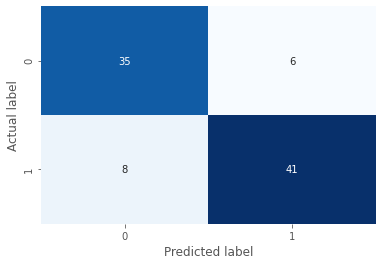

In [63]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot = True, cmap = "Blues", fmt = "d",cbar = False)

#Accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred.round())
print('Accuracy of the model : ', accuracy)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Conclusion